#### Census Income Project
#### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [14]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [3]:
# READING THE DATASET
df=pd.read_csv("census.csv")
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


- As we can see, there are total 15 columns in this census dataset. Where 14 columns are the independent variables and those features are 'Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex' 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',and depending upon these features, the goal is to predict Income of a person is greater than 50K or equals to or less than 50K. Hence, this is a binary classification type of problem. The data contains a good blend of categorical, numerical and missing values(denoting as '?').

In [6]:
df.shape

(32560, 15)

- There are 32560 rows and 15 columns in this dataset.

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- This dataset is mixture of discrete, continuous and nominal value containing columns.

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- There are 14 feature columns these are, Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country' and one target column and that is 'Income'.

In [9]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- As we can see, there is no missing value present in the the dataset regarding this isna() method but there is some missing values are presented as '?' as we have seen before. We need to take care of that before model creation.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- All the columns have 32560 values each and the datatype of those columns are mixture of integer and object.

- Let's check the statistics of the dataset:

In [4]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- There is no missing value present in the numerical columns as count of each column is 32560 .
- minimum Age of a person who earns monney is 17 and maximun age is 90 and average age is 38.
- Maybe the fnlwgt is the sampling weight,fnlwgt is not related to the target variable 'income' and will be removed before building the model.
- Education column is containing number of years of education in total.
- Capital gain and capital loss is maybe outcome( profit or loss ) of investment of a person other than his salary. Both the columns are skewed as the standard deviation is very much bigger than mean value. We need to take care of that. And 
- Hours per week is showing how much time one person is spending for work per week. and it's showing minimum 1 hour to maximum 99 hours people do work and average time hour per week is 40 hours. The difference between min and max is big so we need to check the skewness.
- The values are on different scales.Hence, we will use StandardScaler from the sklearn library to scale the features.

#### Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.

Let's do that:


#### Univariate Analysis:

In [9]:
# we are taking all the numerical columns in a single variable for visualization
df_features=df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']]

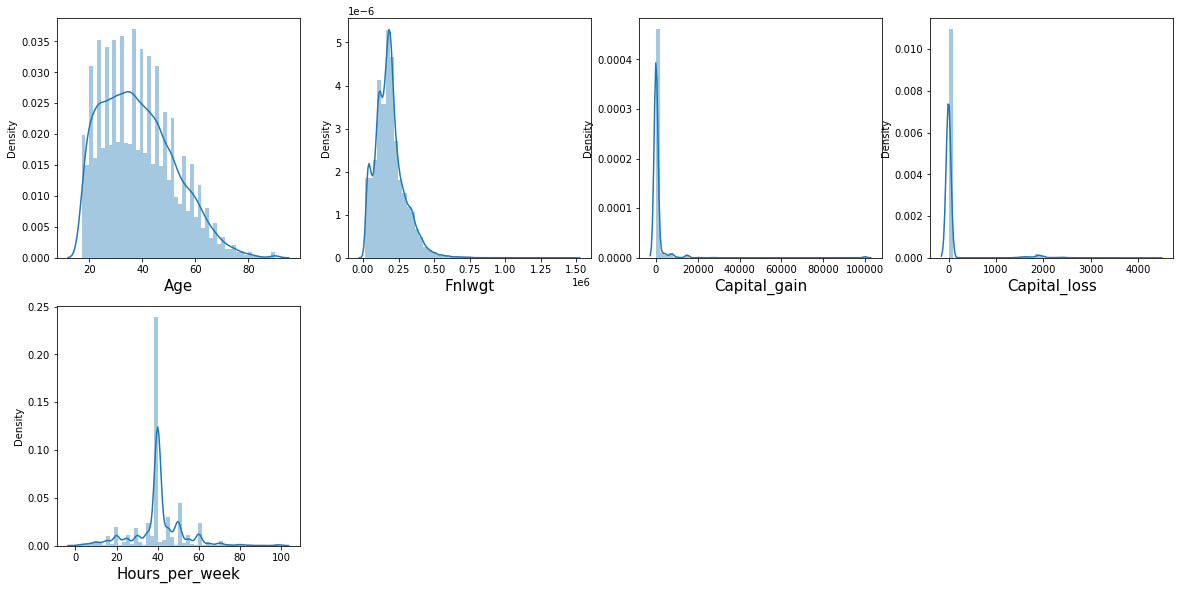

In [10]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=5:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- Age is little right skewed as the difference of minimum working age and maximum working age is big. We need to take care of it.
- Capital_gain and Capital_loss is also very much right skewed.
- 40 is the mean hour per week , and the data is somewhat skewed.

Let's check the value counts of target variable 'Income':

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

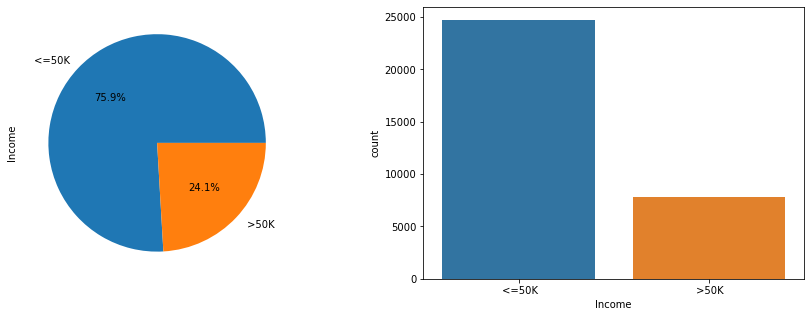

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Income'])
df['Income'].value_counts()

- As we can see, there are two categories in income data, <=50K and >50K. Where the count of <=50K is 24712 which is 75.9%  of people's income and the count of >50 is 7841 which is 24.1% of people's income. As we can see there is imbalance in target data, that we need to take care.


Now let's check the other categorical data as well:

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

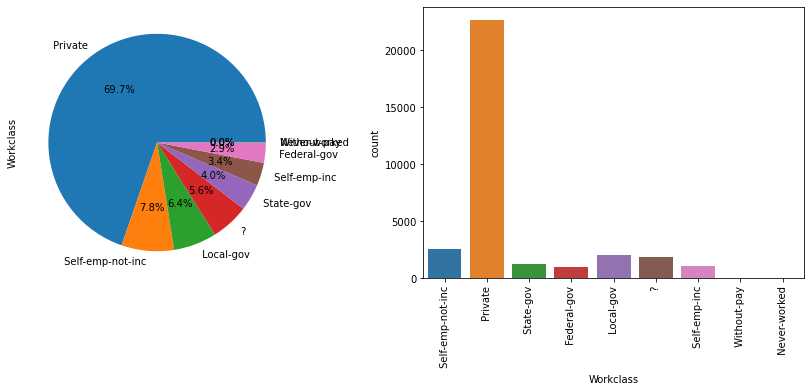

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
df['Workclass'].value_counts()

- There are 9 types of category in Workclass data. Where Private category is highest in count 22696. The count of Never-Worked is least that is 7. And there is another category '?', maybe that is for some unknown job or the data is missing. We need to take care that.

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

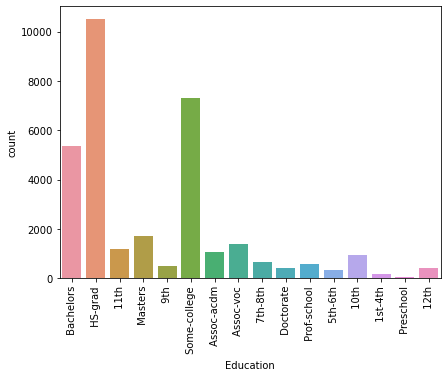

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Education'])
plt.xticks(rotation=90)
df['Education'].value_counts()

- There are 17 categories in Education data where, HS-Graduate people are more in count 10501, than other categories. and people who studied only in Preschool is least, that is 51.

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

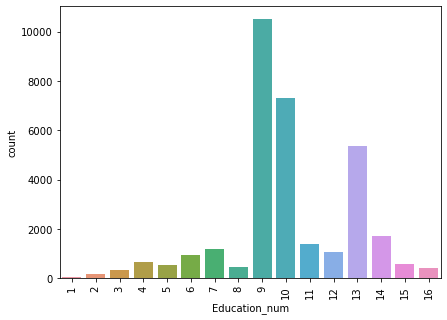

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Education_num'])
plt.xticks(rotation=90)
df['Education_num'].value_counts()

- Education_num column and Education column both are containing same things. Particular in this column the Education standards are written as numbers. Like Hs- grad is written as 9.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

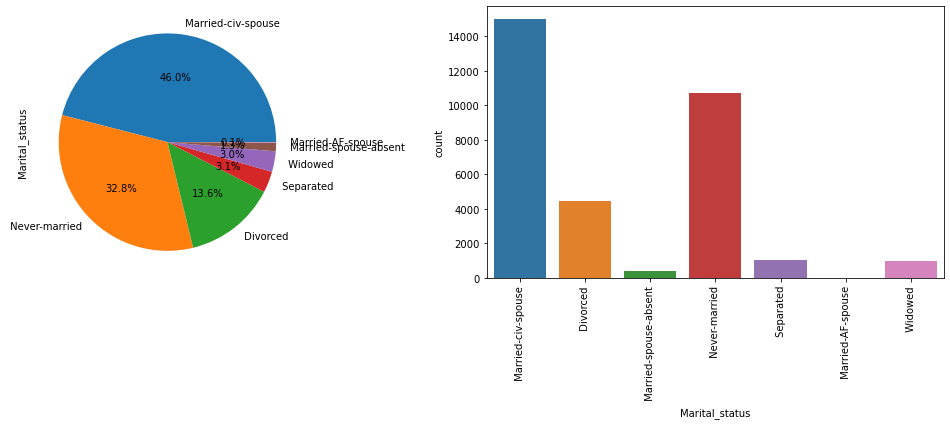

In [86]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
df['Marital_status'].value_counts()

- In this Marital_status column there are 7 categories where count of Married-civ-spouse is 14976 (highest) and count of Married-AF-spouse is 23(least).

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

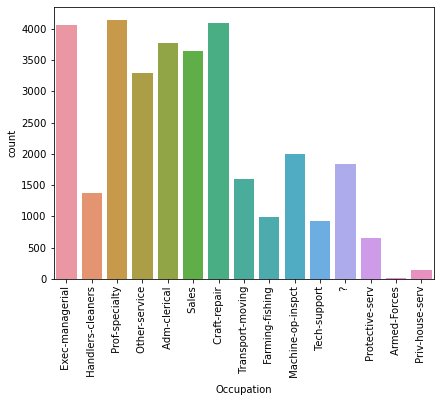

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
df['Occupation'].value_counts()

- As we can see There are 15 different categories in Occupation column. Where count of Prof-specialty is 4140( highest ). And count of Armed-Forces is 9( least ).And there is another category '?', maybe that is for some unknown job or the data is missing, hence we need to take care that.

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

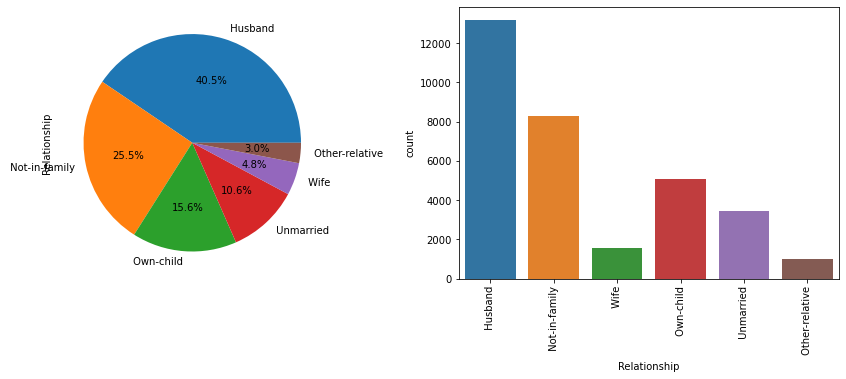

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Relationship'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
df['Relationship'].value_counts()

- In this relationship column there are 6 categories, out of which Husbands are most in counts i.e 13193 (40.5%) and that is highest and count of other-relative is the least, i.e 981(3.0%).

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

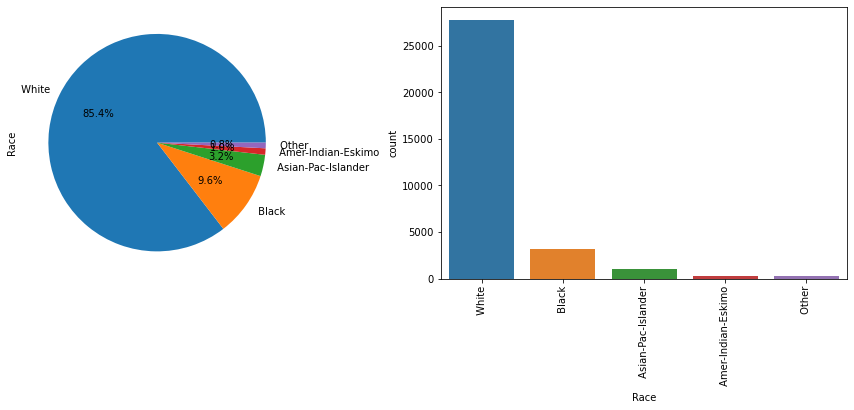

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
df['Race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Race'])
plt.xticks(rotation=90)
df['Race'].value_counts()

- In this Race column there are 5 categories out of which 'White' is highest in counts 27815(85.4%) and Other is least in counts 271(least).

 Male      21789
 Female    10771
Name: Sex, dtype: int64

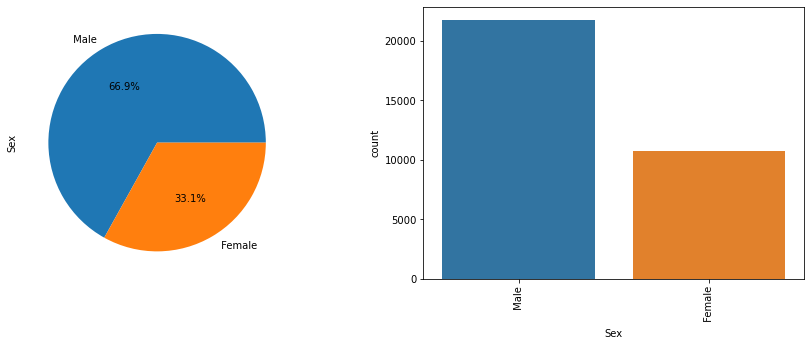

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
df['Sex'].value_counts()

- There are two categories in sex column, male and female where male is more in counts 21789 (66.9%) and female is 10771 (33.1%)in counts

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

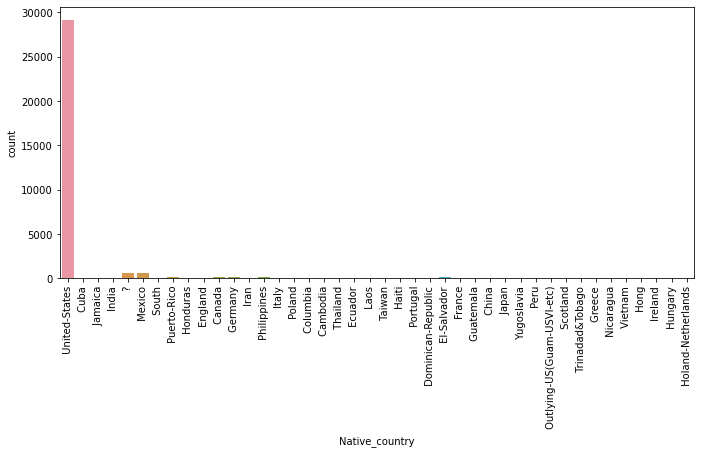

In [20]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
df['Native_country'].value_counts()

- As we can see Native_country column is containing all the data from different countries where United States is having most data 29169 and Holand-Netherlands is having the least 1. In this column also there is another column which is denoted as '?' and it counts 583. Maybe this is missing data but as it is big in number we need to treat it during data cleaning.

In [5]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

- As we can see, there is  little skewness in Age column
- Fnlwgt is very much skewed
- Capital gain is poitively skewed
- Capital_loss is also poitively skewed.

 We need to remove skewness from the dataset before model creation.
 
 
 #### Outlier detection:

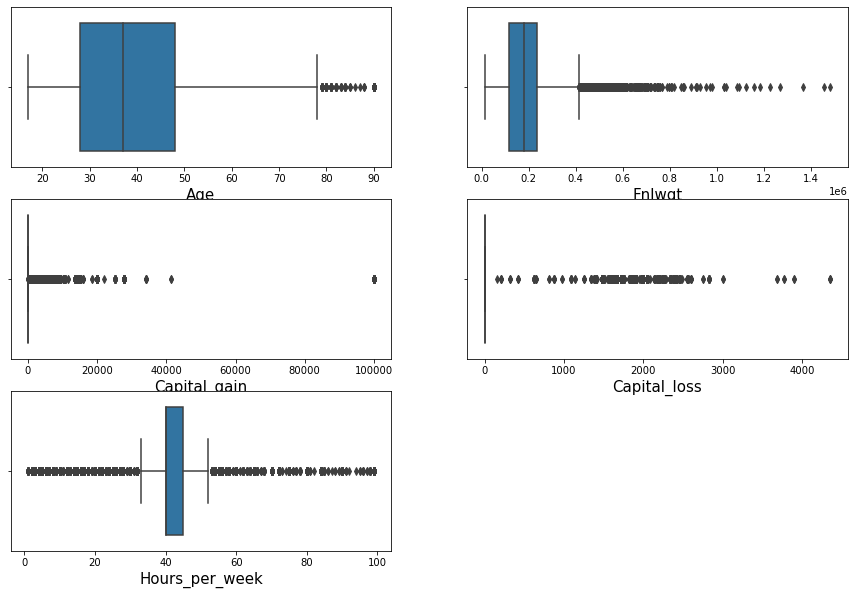

In [22]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()  

- All the numerical data are having outliers that we need to take care.


#### Bivariate Analysis:
In this section we are going to check the relations between feature vs target. But before that we will encode targate variable into numbers as it is in nominal format. Let's do that,

In [6]:
l = LabelEncoder()
l_s = ['Income']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [12]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


- The caegories of target variable 'Income' is changed into binary numbers, 0 and 1. 0 is <=50K and 1 is >50K.

Now let's check the relations also:

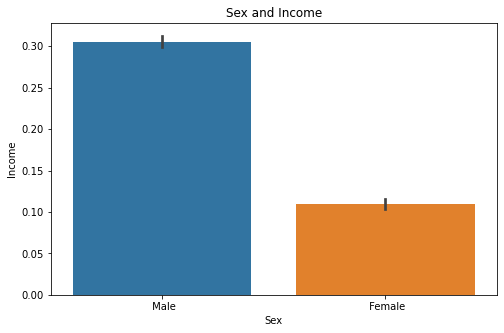

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex',y='Income',data=df).set_title('Sex and Income')
plt.show()

- Income of male individual is more than female individuals as per the dataset.

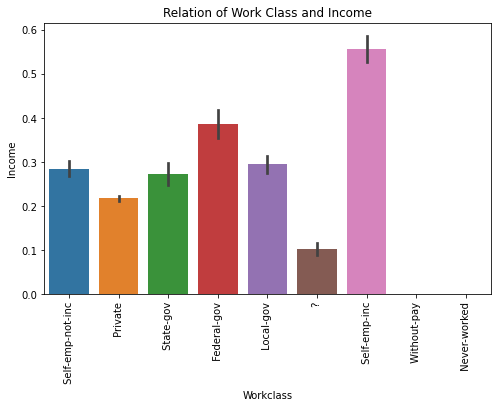

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Workclass',y='Income',data=df).set_title('Relation of Work Class and Income')
plt.xticks(rotation=90)
plt.show()

- It seems that income of Self employed-inc is more than any other workclass.

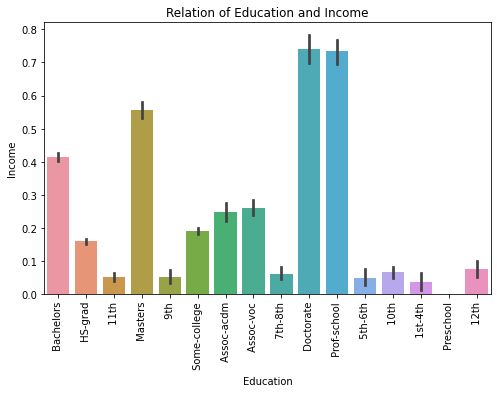

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education',y='Income',data=df).set_title('Relation of Education and Income')
plt.xticks(rotation=90)
plt.show()

- More education more income, so Doctorate and Prof-school people are more likely to income more than other category of students.

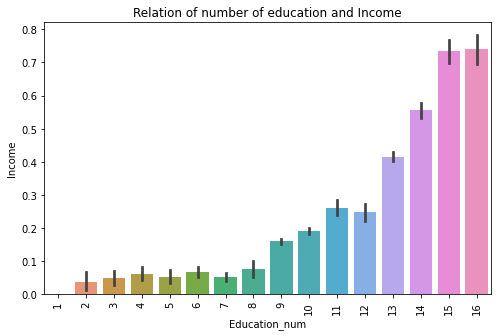

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education_num',y='Income',data=df).set_title('Relation of number of education and Income')
plt.xticks(rotation=90)
plt.show()

- Education_ num 16 has the highest income. If we compare with the Education column we can say that this category 16 is the doctorate people who got the best income.

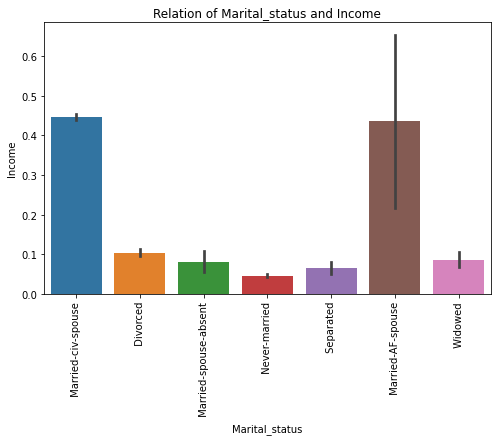

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Marital_status',y='Income',data=df).set_title('Relation of Marital_status and Income')
plt.xticks(rotation=90)
plt.show()

- Income of Married-civ-spouse and married-AF-spouse is higher than any other category regarding Marital_status.

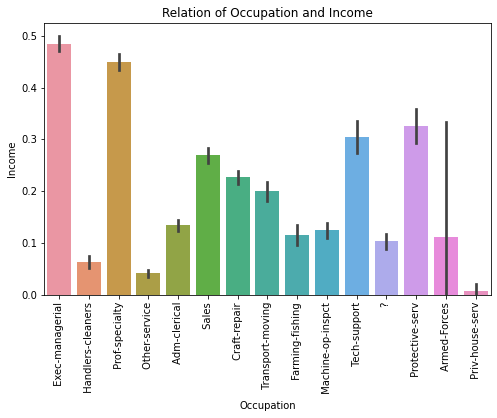

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Occupation',y='Income',data=df).set_title('Relation of Occupation and Income')
plt.xticks(rotation=90)
plt.show()

- Income of category Exec-managerial and prof-speciality is higher than any other category regarding occupation.

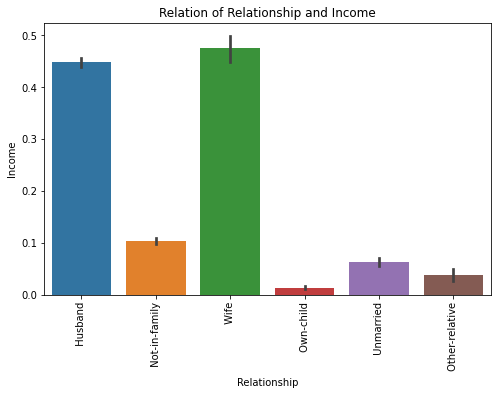

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='Relationship',y='Income',data=df).set_title('Relation of Relationship and Income')
plt.xticks(rotation=90)
plt.show()

- Income of Wife is highest followed by income of husband regarding Relationship.

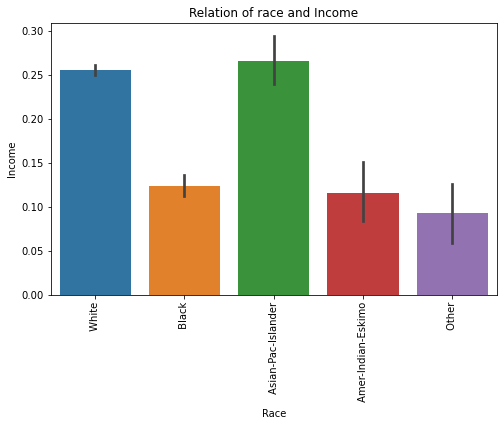

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='Race',y='Income',data=df).set_title('Relation of race and Income')
plt.xticks(rotation=90)
plt.show()

- Income of Asian-Pac-Islander is highest followed by White regarding Race.

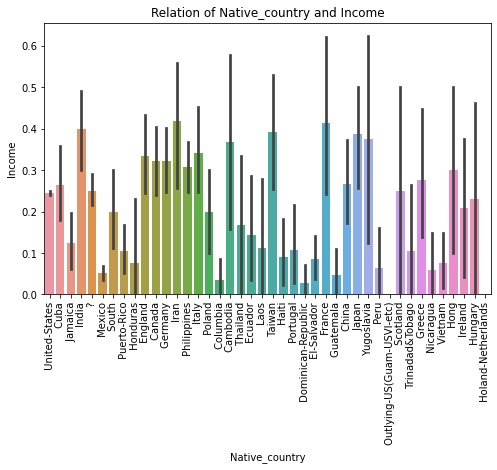

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Native_country',y='Income',data=df).set_title('Relation of Native_country and Income')
plt.xticks(rotation=90)
plt.show()

- Regarding Native countries France, Japan are having the highest income than rest of the nations.

Now it's time to divide the dataset into features and target for checking the relation between numerical data and target. Let's do it then we will check the relation.

In [136]:
#dividing the dataset into features and target
y=df['Income']
x=df.drop(columns=['Income'])

- Relations between Numerical features and target is below:

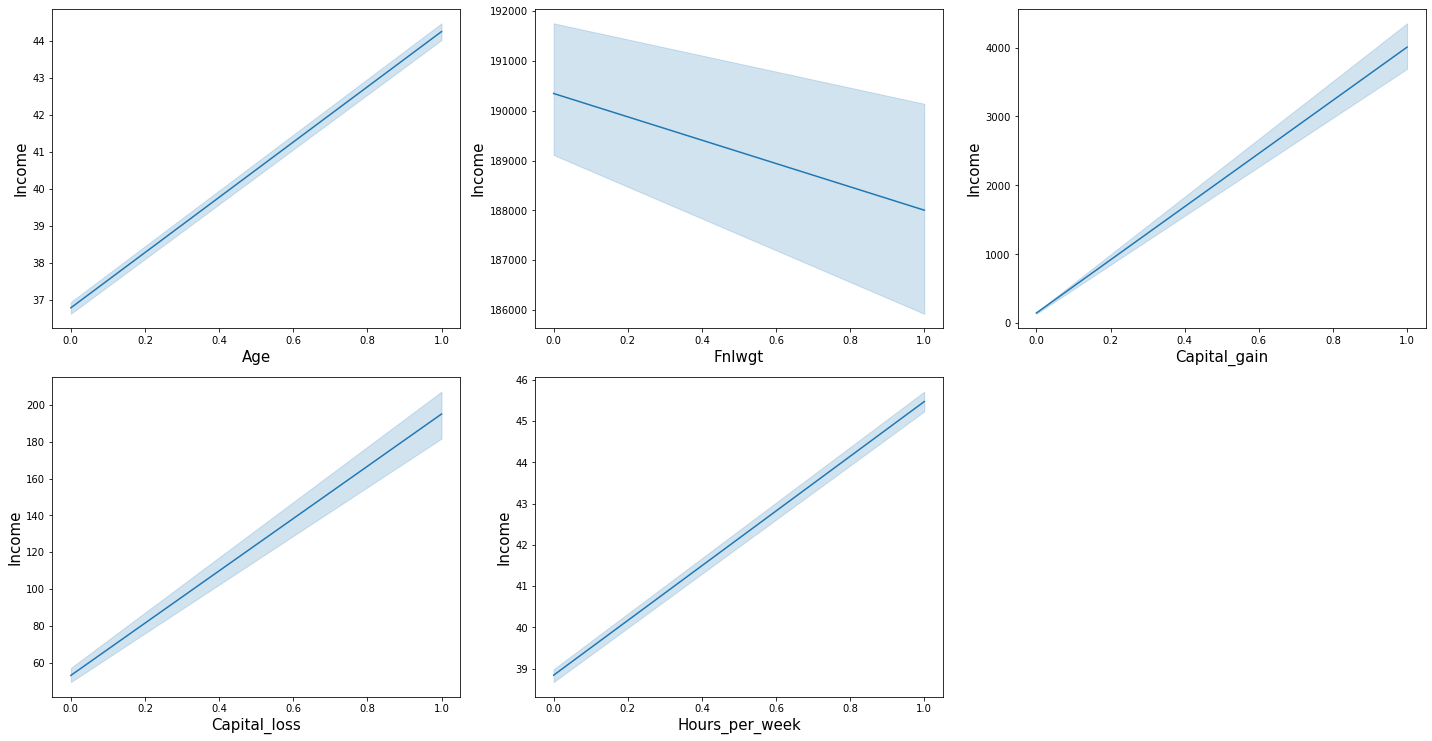

In [137]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.lineplot(y,df_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Income',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- As age go higher the Income is also go higher, it's a linear relation between age and income.
- more fnlwgt less income, negative relation between Final Weight anf Income.
- More capital gain more income , positive relation between income and capital gain.
- More capital loss more income, positive relation between capital loss and capital gain.
- People do more hours job per week their income is more.




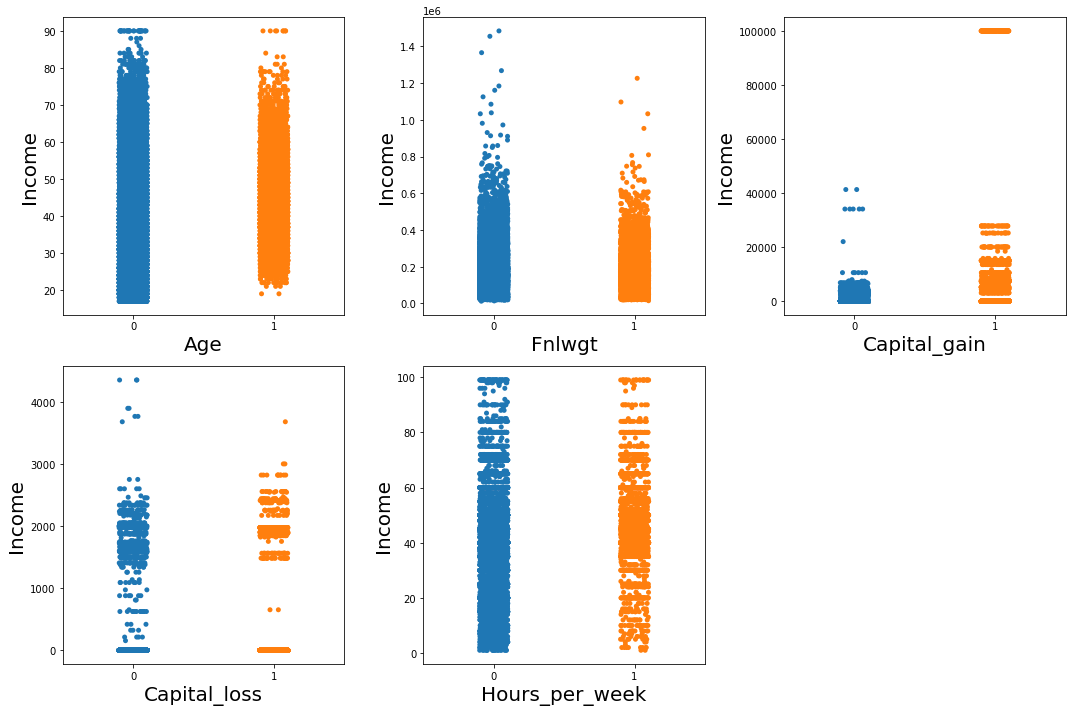

In [138]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.stripplot(y,df_features[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Income',fontsize=20)
    plotnumber+=1
plt.tight_layout()

- In early Age people get <= 50K but with getting older, income of a person is also go higher.
- Final weight is more for <=50K earning people than >50K earning people.
- Capital gain is high for people who's income is >50K.
- Capital loss is high fror people who's income is <=50K.
- People who's income is <=50K they work less than 40 hours than people who earn >50K.

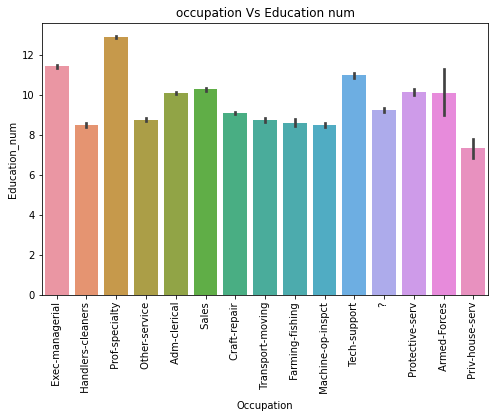

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(x='Occupation',y='Education_num',data=df).set_title('occupation Vs Education num')
plt.xticks(rotation=90)
plt.show()

- Prof-speciality is the occupation that need highest education regarding this dataset,followed by Exec-managerial and tech support professionals.

#### Multivariate Analysis:

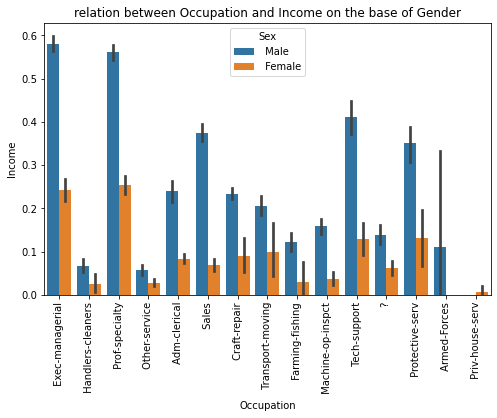

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='Occupation',y='Income',hue='Sex',data=df).set_title('relation between Occupation and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Income of male professionals is always more than female professionals. Out of which income of male Exec-managerial is highest followed by male prof-speciality professionals.

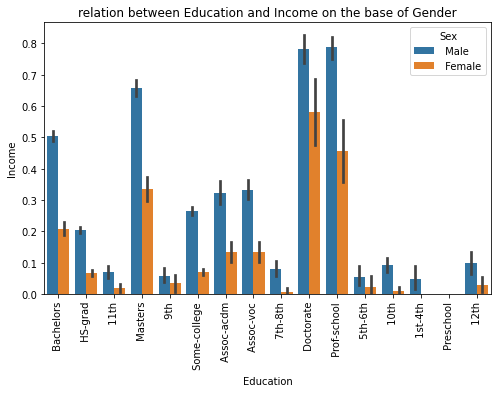

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='Education',y='Income',hue='Sex',data=df).set_title('relation between Education and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Male students who did Doctorate and Prof-school, their income is more than other students.

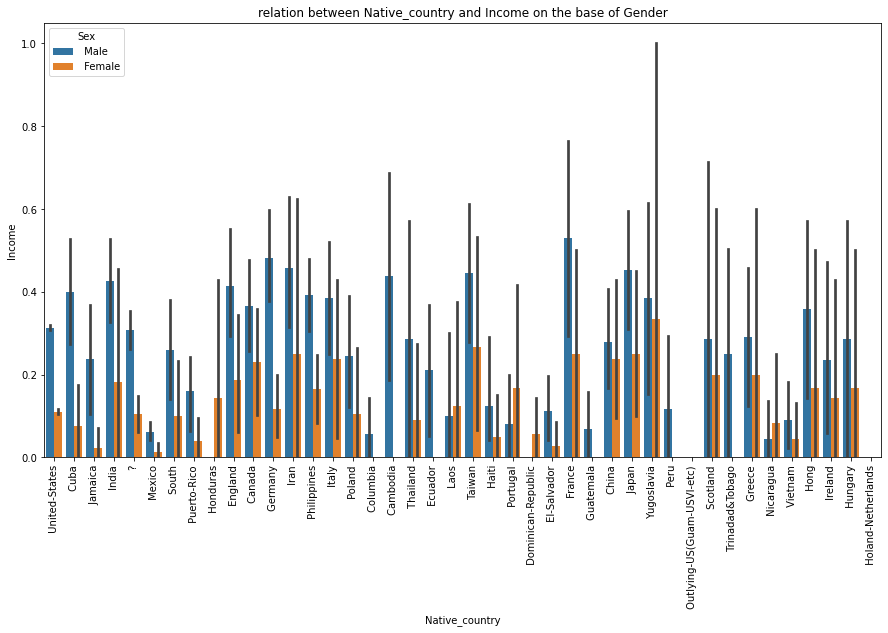

In [142]:
plt.figure(figsize=(15,8))
sns.barplot(x='Native_country',y='Income',hue='Sex',data=df).set_title('relation between Native_country and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Income of male professionals of France is highest than other countries.

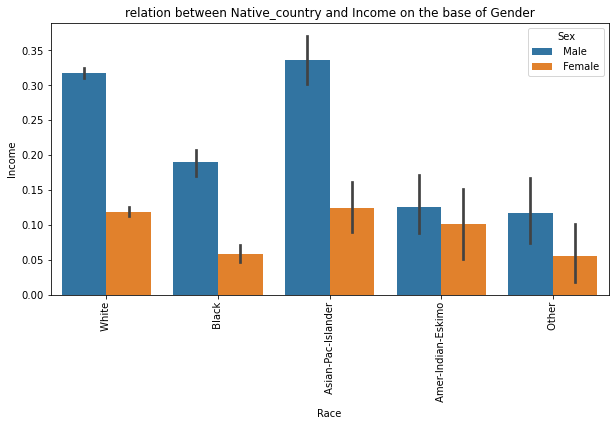

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(x='Race',y='Income',hue='Sex',data=df).set_title('relation between Native_country and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Male Asian-Pac-Islanders income is more than people of other race followed by White male.

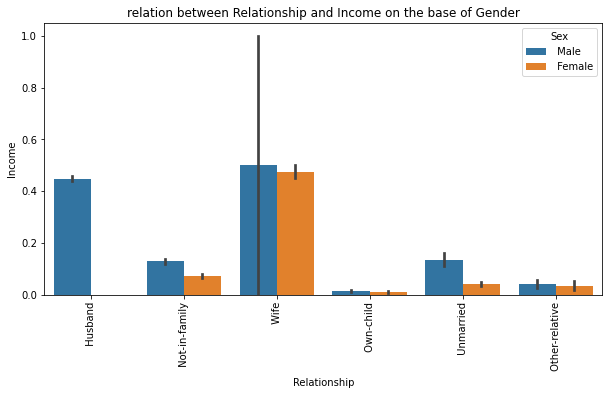

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(x='Relationship',y='Income',hue='Sex',data=df).set_title('relation between Relationship and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Income of Husbands is more than any other relation.

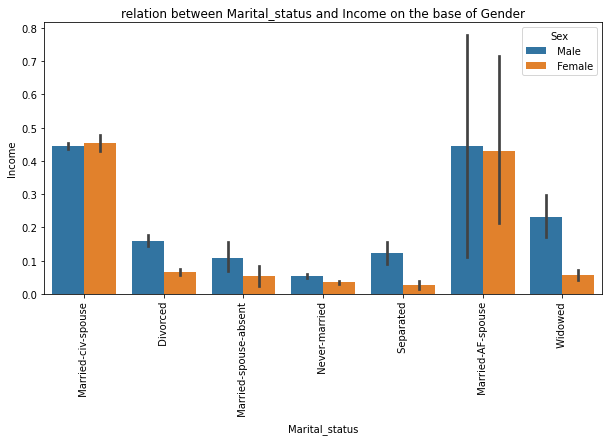

In [145]:
plt.figure(figsize=(10,5))
sns.barplot(x='Marital_status',y='Income',hue='Sex',data=df).set_title('relation between Marital_status and Income on the base of Gender')
plt.xticks(rotation=90)
plt.show()

- Income of female professionals who are Married-civ-spouse is higher than any other person with other marital status.

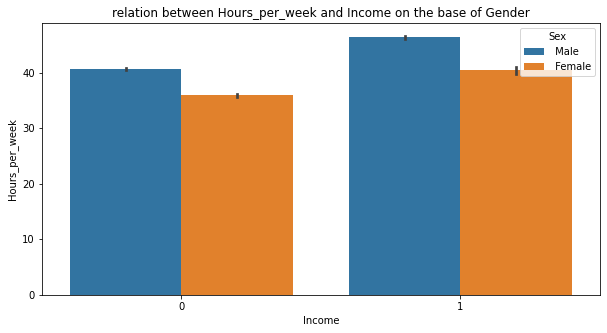

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(x='Income',y='Hours_per_week',hue='Sex',data=df).set_title('relation between Hours_per_week and Income on the base of Gender')
plt.show()

- Male professionals who earn >50K yearly maybe work more hours than who work less hours.

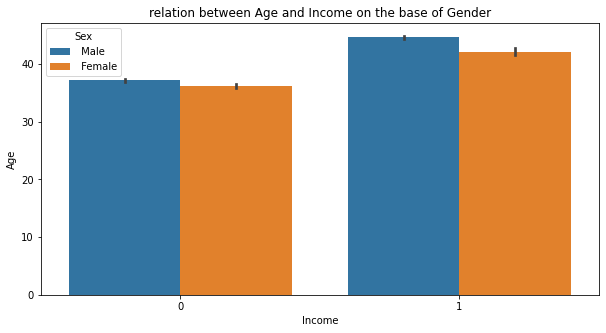

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(x='Income',y='Age',hue='Sex',data=df).set_title('relation between Age and Income on the base of Gender')
plt.show()

- Income of Elder Male and female professionals is more than younger professionals.

Now for making a good model we need to check the correlation between features vs features and feature vs target variable.

In [7]:
corr=df.corr()
corr.shape

(7, 7)

##### Plotting heatmap (correlation matrix)
Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

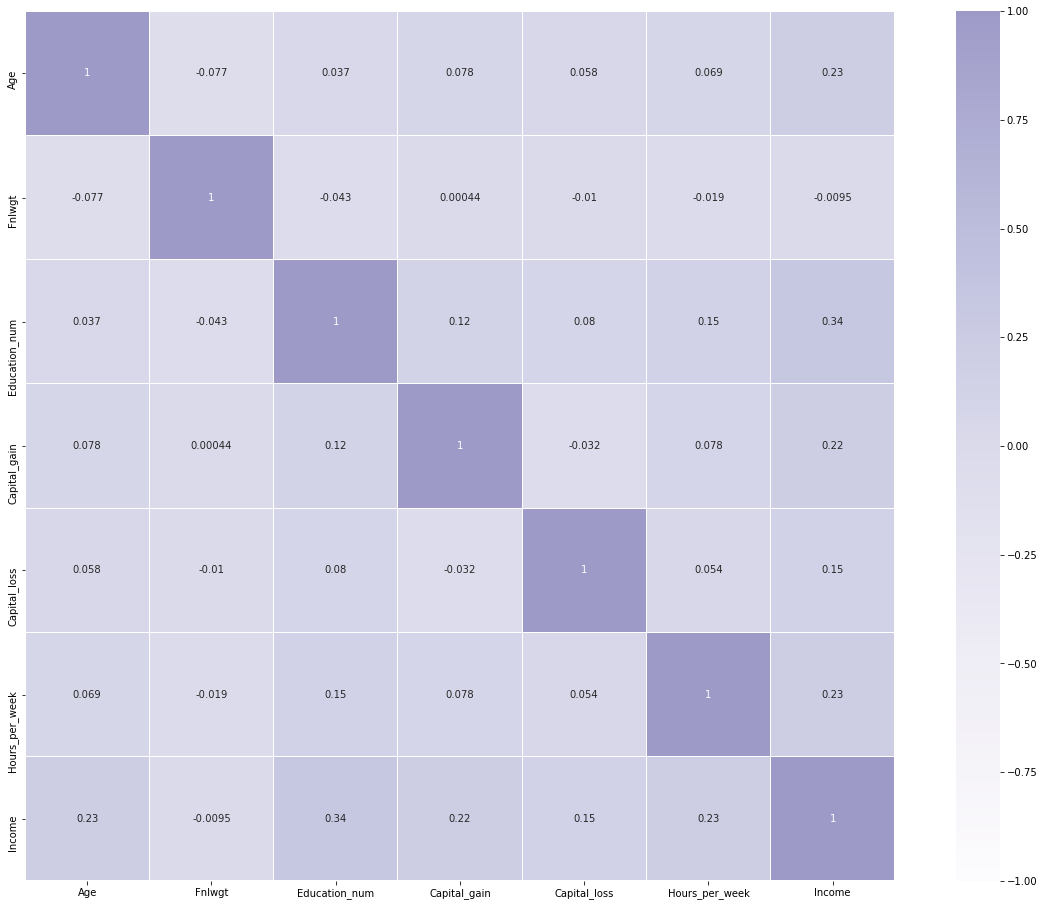

In [37]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Purples',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- Least correlation between features important for Classification problem.
- Not a single feature is correlated with another feature.

#### Data cleaning:

- Filling the '?' value:

In [11]:
# replacing the '?' value with str
df['Workclass'] = df['Workclass'].str.replace('?', 'Private', regex=True)
df['Occupation']=df['Occupation'].str.replace('?','Prof-specialty',regex=True)
df['Native_country']=df['Native_country'].str.replace('?','United-States',regex=True)

In [12]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


- As we can see there is no '?' value in workclass,occupation and Native_country columns.

- Feature Engineering:

In [91]:
#simplifying martial status
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'], 'Married',regex=True)
df['Marital_status']= df['Marital_status'].replace(['Never-married'], 'not-Married',regex=True)
df['Marital_status']= df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'], 'Other',regex=True)

In [92]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


- As we can see we have combined the 7 categories of Marital_status column into 3 categories for simplify the data.

In [93]:
df['Marital_status'].value_counts()

 Married        14999
 not-Married    10682
 Other           6879
Name: Marital_status, dtype: int64

- As we can see we have combined the marital_status column into 3 categories.

 Married        14999
 not-Married    10682
 Other           6879
Name: Marital_status, dtype: int64

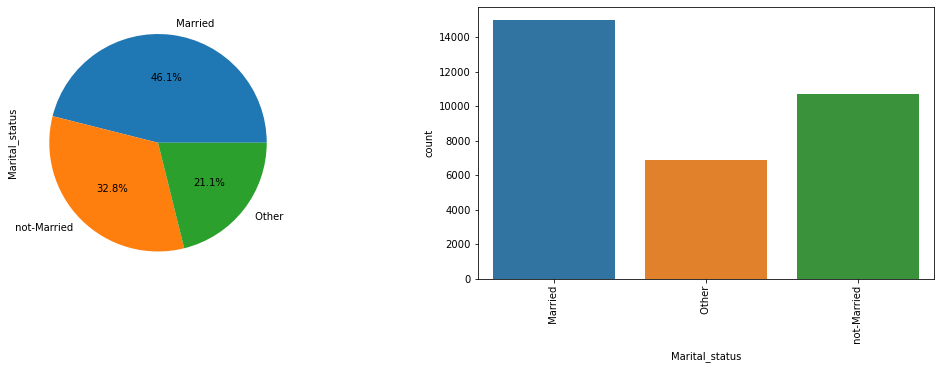

In [94]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
df['Marital_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
df['Marital_status'].value_counts()

- Now the Marital_status column is looking better than before.

#### Outlier removal:
Now let's remove the outliers from the dataset by using z-score.

In [95]:
z_score = zscore(df[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,30028.000000,30028.000000,30028.000000,30028.000000,30028.000000,30028.000000
mean,38.186692,185475.905954,10.022246,567.201279,1.201312,39.881677
std,13.377354,94668.288977,2.537068,2325.902742,32.602580,11.145592
min,17.000000,12285.000000,1.000000,0.000000,0.000000,4.000000
25%,27.000000,117605.750000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,177833.500000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,234704.500000,12.000000,0.000000,0.000000,45.000000
max,79.000000,506329.000000,16.000000,22040.000000,1258.000000,77.000000


- We have applied z-score, now let's check the skewness before model creation:

In [96]:
df.skew()

Age                0.489206
Fnlwgt             0.633615
Education_num     -0.324321
Capital_gain       4.957931
Capital_loss      29.761341
Hours_per_week    -0.350891
dtype: float64

- There are skewness in the numerical columns. Let's remove those skewness. But before that let's remove the 0 values from capital gain and capital loss columns.

In [97]:
df['Capital_gain']=df['Capital_gain'].replace(0,df['Capital_gain'].median())
df['Capital_loss']=df['Capital_loss'].replace(0,df['Capital_loss'].median())

- It's time to remove skewness: 
For that we are using power transformer method.

In [98]:
features=['Fnlwgt','Capital_gain','Capital_loss'] #taking the features into single variable

In [99]:
scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method

In [100]:
df[features]=scaler.fit_transform(df[features].values) #all taken features are transfomed and scaled

#### Encoding: 
 The encoder helps to convert categorical columns having an object dtype to float or integer values.
 Let's do it to convert the Object datatype columns using Ordinal Encoder.

In [102]:
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,-1.116219,9.0,13,0.0,3.0,0.0,4.0,1.0,-0.296001,-0.040013,13,37.0,0.0
1,38,3.0,0.422177,11.0,9,1.0,5.0,1.0,4.0,1.0,-0.296001,-0.040013,40,37.0,0.0
2,53,3.0,0.601968,1.0,7,0.0,5.0,0.0,2.0,1.0,-0.296001,-0.040013,40,37.0,0.0
3,28,3.0,1.480733,9.0,13,0.0,9.0,5.0,2.0,0.0,-0.296001,-0.040013,40,4.0,0.0
4,37,3.0,1.042787,12.0,14,0.0,3.0,5.0,4.0,0.0,-0.296001,-0.040013,40,37.0,0.0


- As we can see our data is looking good to model train. 

Now it's time to divide the dataset into features and target.

In [103]:
y=df['Income']
x=df.drop(columns=['Income'])

- We have divided the dataset into features and target. Now let's balance the target variable.

In [105]:
sm=SMOTE()
x,y = sm.fit_resample(x,y)
y.value_counts()

1.0    23369
0.0    23369
Name: Income, dtype: int64

- Now the Income column (target variable) has balanced data. 

let's scale the dataset as all the columns are in different scales.

#### Standardization:

In [106]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

- Now the data is standardized let's split the data into train and test sets.



##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split) to gauge how well the classifier is working.

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

#### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Gradient Boosting Classifier


#### 1. Logistic Regression:

In [56]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")


=======================Train Result===========================
Accuracy score:80.75%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.843346      0.778641  0.807463      0.810993      0.810891
recall         0.753706      0.860880  0.807463      0.807293      0.807463
f1-score       0.796010      0.817698  0.807463      0.806854      0.806889
support    17471.000000  17582.000000  0.807463  35053.000000  35053.000000
________________________________________________________________
 Confusion Matrix:
[[13168  4303]
 [ 2446 15136]]



In [57]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:81.17%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.848736     0.780981  0.811724      0.814859      0.815180
recall        0.762970     0.861414  0.811724      0.812192      0.811724
f1-score      0.803571     0.819228  0.811724      0.811400      0.811325
support    5898.000000  5787.000000  0.811724  11685.000000  11685.000000
________________________________________________________________
 Confusion Matrix:
[[4500 1398]
 [ 802 4985]]



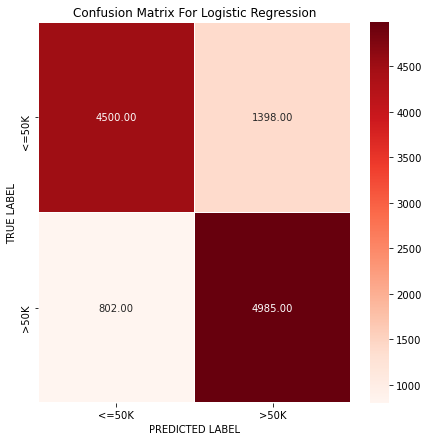

In [58]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['<=50K','>50K']
y_axis_labels=['<=50K','>50K']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [59]:
#checking ROC_AUC Score of Logistic Regression:

roc_auc_score(y_test,lr.predict(x_test))

0.8121920057602713

#### 2. Decision Tree Classifier :

In [60]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999943      1.000000  0.999971      0.999971      0.999971
recall         1.000000      0.999943  0.999971      0.999972      0.999971
f1-score       0.999971      0.999972  0.999971      0.999971      0.999971
support    17471.000000  17582.000000  0.999971  35053.000000  35053.000000
________________________________________________________________
 Confusion Matrix:
[[17471     0]
 [    1 17581]]



In [61]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:85.96%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.865305     0.854021  0.859649      0.859663      0.859717
recall        0.855036     0.864351  0.859649      0.859693      0.859649
f1-score      0.860140     0.859155  0.859649      0.859647      0.859652
support    5898.000000  5787.000000  0.859649  11685.000000  11685.000000
________________________________________________________________
 Confusion Matrix:
[[5043  855]
 [ 785 5002]]



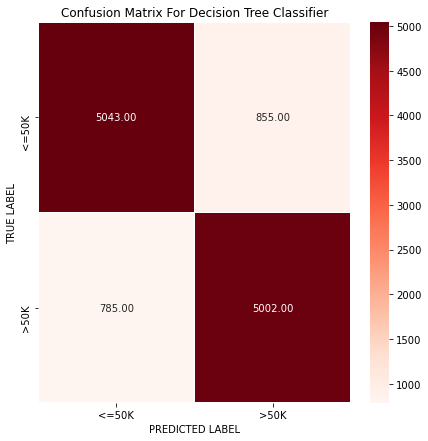

In [62]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['<=50K','>50K']
y_axis_labels=['<=50K','>50K']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [63]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8596933685685864

#### 3. Random Forest Classifier :

In [76]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:99.99%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.999886  0.999943      0.999943      0.999943
recall         0.999886      1.000000  0.999943      0.999943      0.999943
f1-score       0.999943      0.999943  0.999943      0.999943      0.999943
support    17471.000000  17582.000000  0.999943  35053.000000  35053.000000
________________________________________________________________
 Confusion Matrix:
[[17469     2]
 [    0 17582]]



In [77]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")     


=======================Test Result of RF_clf===========================
Accuracy score:90.24%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.911861     0.893063  0.902353      0.902462      0.902551
recall        0.892845     0.912044  0.902353      0.902445      0.902353
f1-score      0.902253     0.902454  0.902353      0.902353      0.902352
support    5898.000000  5787.000000  0.902353  11685.000000  11685.000000
________________________________________________________________
 Confusion Matrix:
[[5266  632]
 [ 509 5278]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

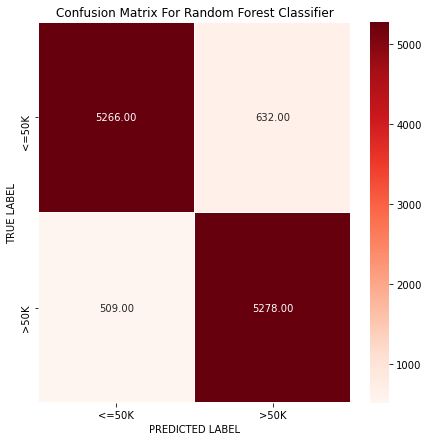

In [78]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['<=50K','>50K']
y_axis_labels=['<=50K','>50K']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [79]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

0.9024446346487137

#### 4. K-Neighbors Classifier :

In [219]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:89.26%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.939806      0.854854   0.89262      0.897330      0.897195
recall         0.838246      0.946650   0.89262      0.892448      0.892620
f1-score       0.886126      0.898413   0.89262      0.892269      0.892289
support    17471.000000  17582.000000   0.89262  35053.000000  35053.000000
________________________________________________________________
 Confusion Matrix:
[[14645  2826]
 [  938 16644]]



In [220]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      


=======================Test Result of KNN_clf===========================
Accuracy score:85.09%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.896414     0.813907   0.85092      0.855160      0.855552
recall        0.796711     0.906169   0.85092      0.851440      0.850920
f1-score      0.843627     0.857563   0.85092      0.850595      0.850529
support    5898.000000  5787.000000   0.85092  11685.000000  11685.000000
________________________________________________________________
 Confusion Matrix:
[[4699 1199]
 [ 543 5244]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

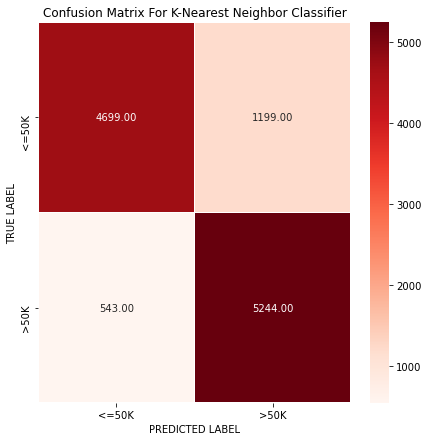

In [221]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['<=50K','>50K']
y_axis_labels=['<=50K','>50K']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [222]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

0.8514398744440875

#### 5. Gradient Boosting Classifier:

In [225]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:87.79%
_______________________________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.905508      0.854048  0.877928      0.879778      0.879697
recall         0.843054      0.912581  0.877928      0.877818      0.877928
f1-score       0.873166      0.882345  0.877928      0.877755      0.877770
support    17471.000000  17582.000000  0.877928  35053.000000  35053.000000
________________________________________________________________
 Confusion Matrix:
[[14729  2742]
 [ 1537 16045]]



In [226]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n") 


=======================Test Result===========================
Accuracy score:87.77%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.906642     0.852019  0.877706      0.879331      0.879590
recall        0.844693     0.911353  0.877706      0.878023      0.877706
f1-score      0.874572     0.880688  0.877706      0.877630      0.877601
support    5898.000000  5787.000000  0.877706  11685.000000  11685.000000
________________________________________________________________
 Confusion Matrix:
[[4982  916]
 [ 513 5274]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

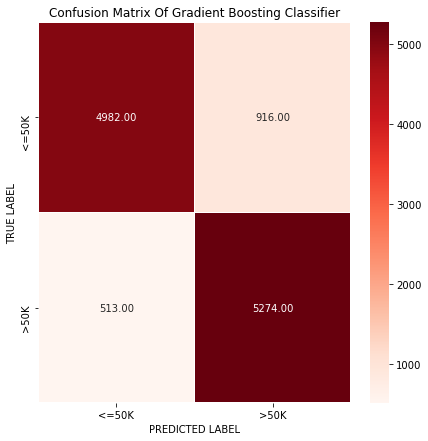

In [227]:
cm = confusion_matrix(y_test,pred)

x_axis_labels=['<=50K','>50K']
y_axis_labels=['<=50K','>50K']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [228]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,gbdt_clf.predict(x_test))

0.8780230744850113

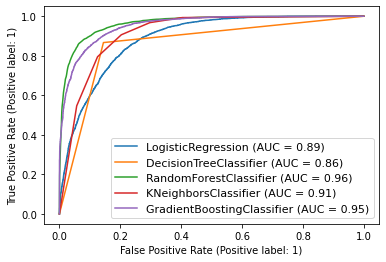

In [243]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### Observation: 

- We have seen that Random Forest Classifier has given the best accuracy regarding classify the Income.
- And it's count of false positive is  also least(632). 
- The AUC Curve of RFC covers most of the area than other models.

Now we need to check the cross validation scores for each of the models to get the best model out of 5.

####    Cross validation :

   Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [69]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:80.46%


In [70]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:85.50%


In [71]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:89.86%


In [239]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:84.04%


In [240]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:87.18%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model from the 5 models:

- Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :
- LR = 80.98-80.59 = 0.39 
- DT = 86.10-85.47 = 0.63 
- Rf = 90.00-89.80 = 0.2 
- KNN = 85.09-84.04 = 1.05
- Gbdt_clf = 87.77-87.18 = 0.59

So, as the accuracy score of random forest classifier is  90% and  as the difference of Accuracy Score and CV of Random Forest Classifier is least, it's the best Model. Let's do Hyperparameter Tuning of RFC.

#### Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Random Forest Classifier. After getting the best parameters we can use those with the model to obtain best accuracy.


In [72]:
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15],'criterion':['entropy','gini'],'max_features':['auto', 'sqrt','log2'],
        'max_depth':[10,13,15],'min_samples_split':[10,12,11],'min_samples_leaf':[4,5,6]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15}
con_mat=>  
 [[4912  986]
 [ 462 5325]]
Accuracy of rf After Hyperparameter Tuning==>  87.60804450149764


- Somehow after hyperparameter tuning the Accuracy is decreased. So we are going to save the previous Random Forest classified model which has given us 90% of accuracy.

In [73]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      5898
           1       0.84      0.92      0.88      5787

    accuracy                           0.88     11685
   macro avg       0.88      0.88      0.88     11685
weighted avg       0.88      0.88      0.88     11685



- We can see the Precision is 91% and 84%, recall is 83% and 92%, f1 score is 87% and 88% with respect to <=50K and >50K income.


Let's check the ROC-AUC Curve of RFC after hyperparameter tuning:

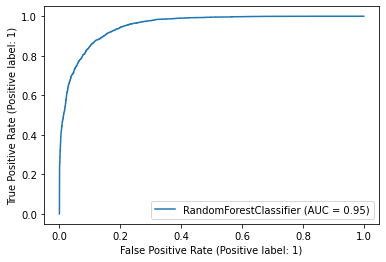

In [74]:
disp = plot_roc_curve(rfc,x_test,y_test)

- As we can see the AUC Curve covers the highet area of the graph. 

#### Why are we saving the Random Forest Classifier Model?

- Let's save Random Forest Classifier model for Income classification as it's given the best accuracy(90%), the difference of accuracy and CV is the least and it's count of false positive is also least(632).

In [80]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_cen = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_cen))

       predicted_values  orignal_values
41264                 1               1
20402                 0               0
13131                 0               0
18003                 0               0
27816                 0               0
...                 ...             ...
45241                 1               1
2054                  0               0
1057                  0               0
38224                 1               1
3806                  0               0

[11685 rows x 2 columns]


In [81]:
#import joblib
import joblib

joblib.dump(rf,'rfc_cen_file.obj')

# SAVING THE MODEL

['rfc_cen_file.obj']

In [82]:
rf_from_joblib=joblib.load('rfc_cen_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 0, ..., 0, 1, 0])

#### Conclusion:

- The given dataset conveys us so much information about Income of population of different countries. By doing the analysis we can say A higher number of popultion is earning <=50K  annually while a few number of population is earning >50K. It gives us the insight of standard of living of the different popultion. 
- During analysis we have seen that there is no equal pay system in those various populations. as webhave seen most of the female professionals are Earning less than male professionals with same education or profession.
- The male female ratio is also low.
- It also provided that number of white people participation was most in comprision to the other races this also hints towards the social biasness towards a perticular race. 
- After analysing the data we have made 5 different models, out of which Random Forest Classifier has given the best accuracy of 90%, and it's type 1 error(false positive) is also least than other models, hence we have saved it.